In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
pwd

'E:\\Data_Science\\Linear_Reg\\New folder'

In [82]:
# Importing height weight csv
df = pd.read_csv('Height_Weight.csv')
df

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157
...,...,...,...,...
194,65,M,97,189
195,30,M,101,183
196,54,M,102,185
197,97,M,103,185


In [83]:
#Observing first 5 rows in the dataset df
df.head()

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157


In [84]:
# To find the datatypes of each column in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      199 non-null    int64 
 1   gender  199 non-null    object
 2   weight  199 non-null    int64 
 3   height  199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [85]:
# Let's look at some statistical information about our dataframe.
df.describe() 

,id,weight,height
count,199.000000,199.000000,199.000000
mean,100.944724,65.195980,170.587940
std,57.681571,13.008031,8.948848
min,1.000000,39.000000,148.000000
25%,51.500000,55.000000,164.000000
50%,101.000000,63.000000,170.000000
75%,150.500000,73.500000,177.500000
max,200.000000,103.000000,197.000000


In [86]:
#Statistical Information about Categorical Columns
df.describe(include='object')

,gender
count,199
unique,2
top,F
freq,111


In [87]:
#Dropping "id" column as it is unique identification for each row
df.drop(['id'], axis = 1,inplace=True)
df

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157
...,...,...,...
194,M,97,189
195,M,101,183
196,M,102,185
197,M,103,185


In [88]:
# Finding missing values in df
df.isnull()

,gender,weight,height
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
194,False,False,False
195,False,False,False
196,False,False,False
197,False,False,False


In [89]:
#Finding the sum of missing values 'columnwise'
df.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

Univariate Analysis

In [90]:
#Frequency Matrix of 'Gender' column
df['gender'].value_counts()

gender
F    111
M     88
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

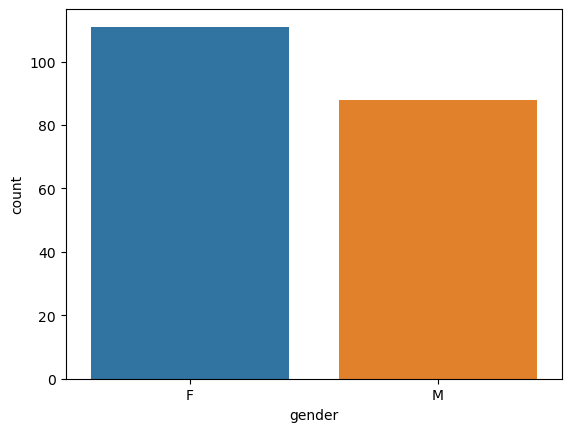

In [91]:
#Bar chart of frequency count (for Male & Female)
sns.countplot(x = 'gender' , data = df)

<Axes: xlabel='height', ylabel='weight'>

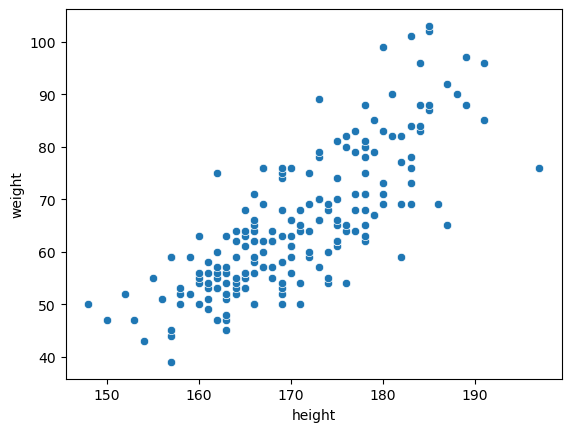

In [92]:
#Looking at the scatter plot between "weight" & 'height'
sns.scatterplot(x=df['height'],y=df['weight'])

In [95]:
df_dummies = pd.get_dummies(df['gender'], drop_first=True).astype(int)
df_dummies

,M
0,0
1,0
2,0
3,0
4,0
...,...
194,1
195,1
196,1
197,1


In [96]:
#Combined column wise, appending of columns
df_combined = pd.concat([df, df_dummies], axis=1)
df_combined

,gender,weight,height,M
0,F,39,157,0
1,F,43,154,0
2,F,44,157,0
3,F,45,163,0
4,F,45,157,0
...,...,...,...,...
194,M,97,189,1
195,M,101,183,1
196,M,102,185,1
197,M,103,185,1


In [97]:
df_combined.drop(columns=['gender'], inplace=True)
df_combined

,weight,height,M
0,39,157,0
1,43,154,0
2,44,157,0
3,45,163,0
4,45,157,0
...,...,...,...
194,97,189,1
195,101,183,1
196,102,185,1
197,103,185,1


In [98]:
#Finding Correlation Coeficient betweeen weight and height
corr_matrix = df[['height', 'weight']].corr()
corr_matrix

,height,weight
height,1.000000,0.782438
weight,0.782438,1.000000


C:\Users\Arihant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


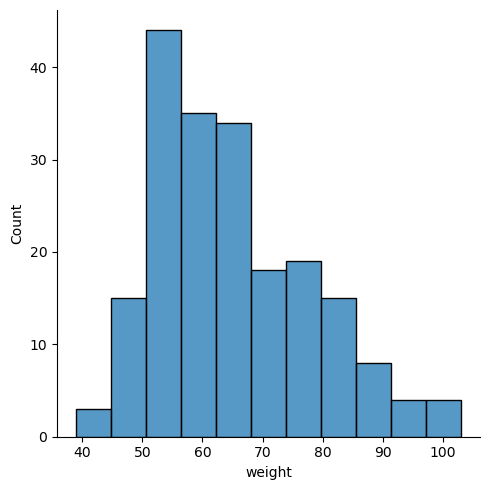

In [42]:
#Distribution Plot for "weight"
sns.displot(df_combined['weight'],kind='hist')

C:\Users\Arihant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


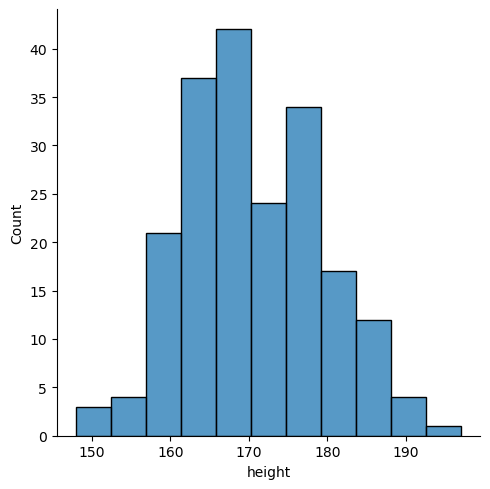

In [43]:
#Distribution Plot for "height" column
sns.displot(df_combined.height,kind='hist')

In [44]:
#Skew in the distribution of 'weight' column
df_combined['weight'].skew() #Moderately Skewed

0.7449402052268245

In [45]:
#Skew in the distribution of "height" column
df_combined['height'].skew() #Almost Symmetric

0.2129090698591845

<Axes: >

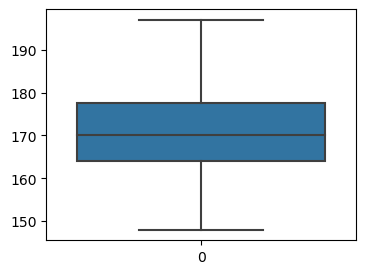

In [52]:
#Outlier Detection of "height" column
plt.figure(figsize=(4, 3)) 
sns.boxplot(df['height'])

<Axes: >

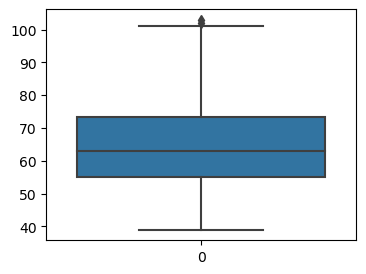

In [50]:
#Outlier Detection of 'weight' column
plt.figure(figsize=(4, 3)) 
sns.boxplot(df.weight)

In [53]:
#Modified Data set 
df_combined.head()

,weight,height,M
0,39,157,0
1,43,154,0
2,44,157,0
3,45,163,0
4,45,157,0


In [54]:
#Find Missing Values
df_combined.isnull().sum(axis = 0)

weight    0
height    0
M         0
dtype: int64

In [55]:
# Putting feature variable to X (ie X = Dataset after removing Interest Rate)
X = df_combined.drop('weight', axis= 1)

In [56]:
# Putting response variable to y
y = df_combined['weight']

In [57]:
X 

,height,M
0,157,0
1,154,0
2,157,0
3,163,0
4,157,0
...,...,...
194,189,1
195,183,1
196,185,1
197,185,1


In [58]:
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

Splitting the data in Training and Test set
Using sklearn we split 70% of our data into training set and rest in test set.
Setting random_state will give the same training and test set everytime on running the code.

In [59]:
#Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=12)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((139, 2), (139,), (60, 2), (60,))

Performing Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

LinearRegression()

In [62]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

Step 5 : Model Evaluation

In [63]:
# print the intercept
print(lm.intercept_)

-77.90658193188455


In [64]:
# print the intercept
print(lm.coef_)

[0.82001155 7.9819506 ]


In [65]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,0.820012
M,7.981951


<Axes: xlabel='M', ylabel='weight'>

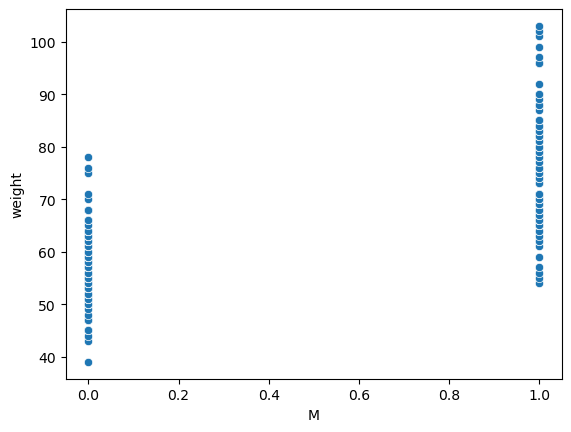

In [67]:
sns.scatterplot(x=df_combined['M'],y=df_combined['weight'])

In [68]:
# Making predictions using the model
y_pred = lm.predict(X_test)
print(y_pred)

[80.13748194 58.21533502 59.85535812 76.85743575 58.21533502 55.75530038
 77.67744729 71.93736646 54.93528883 60.67536967 54.93528883 61.49538122
 82.59751658 43.45512716 51.65524264 67.01729717 84.23753968 63.13540431
 75.21741265 59.03534657 54.93528883 76.0374242  57.39532348 55.75530038
 76.85743575 67.83730872 81.77750503 56.57531193 76.0374242  76.0374242
 75.21741265 76.0374242  73.57738955 57.39532348 69.47733181 48.37519645
 55.75530038 59.85535812 61.49538122 54.93528883 53.29526574 68.65732027
 71.93736646 58.21533502 55.75530038 56.57531193 52.47525419 45.09515026
 66.4154505  77.67744729 91.61764361 67.83730872 85.05755122 57.39532348
 62.31539276 60.67536967 85.05755122 58.21533502 47.5551849  86.69757432]


In [69]:
#Model Performance Metrics
#Coefficient of Determination (R square)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared



0.661438222561686

In [70]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 64.254793335574
Root_Mean_Squared_Error : 8.015908765422296
r_square_value : 0.661438222561686


In [71]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
148,73,80.137482
11,50,58.215335
92,62,59.855358
124,67,76.857436
93,62,58.215335
21,52,55.755300
198,99,77.677447
62,57,71.937366
7,47,54.935289
29,53,60.675370


In [72]:
df_combined

,weight,height,M
0,39,157,0
1,43,154,0
2,44,157,0
3,45,163,0
4,45,157,0
...,...,...,...
194,97,189,1
195,101,183,1
196,102,185,1
197,103,185,1


Lets try with Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled

array([[ 0.15930019,  1.11442159],
       [ 0.87744269,  1.11442159],
       [-0.91791355, -0.89732648],
       [ 0.39868103, -0.89732648],
       [-1.15729438, -0.89732648],
       [ 1.11682352,  1.11442159],
       [-1.51636563, -0.89732648],
       [-1.2769848 , -0.89732648],
       [-1.03760396, -0.89732648],
       [-0.31946147, -0.89732648],
       [ 1.59558518,  1.11442159],
       [-0.67853272,  1.11442159],
       [-1.2769848 , -0.89732648],
       [ 0.87744269,  1.11442159],
       [-1.03760396, -0.89732648],
       [ 0.27899061,  1.11442159],
       [-0.91791355, -0.89732648],
       [-0.43915189, -0.89732648],
       [-0.31946147, -0.89732648],
       [-0.19977105, -0.89732648],
       [ 1.23651394,  1.11442159],
       [ 0.27899061,  1.11442159],
       [ 0.63806186,  1.11442159],
       [ 0.39868103,  1.11442159],
       [-1.39667521, -0.89732648],
       [ 0.51837144,  1.11442159],
       [ 1.7152756 ,  1.11442159],
       [ 1.11682352,  1.11442159],
       [-0.19977105,

In [76]:
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [77]:
y_pred = lm.predict(X_test_scaled)
print(y_pred)

[80.13748194 58.21533502 59.85535812 76.85743575 58.21533502 55.75530038
 77.67744729 71.93736646 54.93528883 60.67536967 54.93528883 61.49538122
 82.59751658 43.45512716 51.65524264 67.01729717 84.23753968 63.13540431
 75.21741265 59.03534657 54.93528883 76.0374242  57.39532348 55.75530038
 76.85743575 67.83730872 81.77750503 56.57531193 76.0374242  76.0374242
 75.21741265 76.0374242  73.57738955 57.39532348 69.47733181 48.37519645
 55.75530038 59.85535812 61.49538122 54.93528883 53.29526574 68.65732027
 71.93736646 58.21533502 55.75530038 56.57531193 52.47525419 45.09515026
 66.4154505  77.67744729 91.61764361 67.83730872 85.05755122 57.39532348
 62.31539276 60.67536967 85.05755122 58.21533502 47.5551849  86.69757432]


In [79]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared


0.661438222561686